<br/>
# CSIT 5800 Introduction to Big Data
### Assignment 1 - Data Pre-processing and Exploratory Analysis

### Description
In this assignment, you will have an opportunity to apply data pre-processing tecniques that you learned in the class to a problem. In addition, you will do exploratory analysis on the given dataset.

To get started on this assignment, you need to download the given dataset and read the description carefully written on this page. Please note that all implementation of your program should be done with Python.
<br/>

### Intended Learning Outcomes

- Upon completion of this assignment, you should be able to:
<ol>
    <li>Demonstrate your understanding on how to pre-process data using the algorithms / techniques as described in the class.</li>
    <li>Use simple descriptive statistical appraoches to understand your data.</li>
    <li>Construct Python program to analyse the data and draw simple conclusions from it.</li>
</ol>

### Required Libraries
The following libraries are required for this assignment:
<ol>
    <li>Numpy - Numerical python</li>
    <li>Scipy - Scientific python</li>
    <li>Matplotlib - Python 2D plotting library</li>
    <li>Seaborn - Visualization library based on matplotlib</li>
    <li>Pandas - Python data analysis library</li>
</ol>

### Dataset ~ House Prices (<a href="https://canvas.ust.hk/courses/23028/files/folder/Assignment1">house-train.csv</a>)

This dataset consists of sales prices of houses in Ames, Iowa (<a href="http://www.amstat.org/publications/jse/v19n3/decock.pdf">The Ames Housing Dataset</a>).
The training dataset has 1460 instances with unique Ids, sales prices, and 79 more features.

<ul>
<li>Pricing — Monetary values, one of which is the sales price we are trying to determine<br />
Examples: SalePrice, MiscVal    
</li> 
<li>Dates — Time based data about when it was built, remodeled or sold.<br />
Example: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
</li>
<li>Quality/Condition — There are categorical assessment of the various features of the houses, most likely from the property assessor.<br />
Example: PoolQC, SaleCondition, GarageQual, HeatingQC
</li>
<li>Property Features — Categorical collection of additional features and attributes of the building<br />
Example: Foundation, Exterior1st, BsmtFinType1, Utilities
</li>
<li>Square Footage — Area measurement of section of the building and features like porches and lot area(which is in acres)<br />
Example: TotalBsmtSF, GrLivArea, GarageArea, PoolArea, LotArea
</li>
<li>Room/Feature Count — Quantitative counts of features (versus categorical) like rooms, prime candidate for feature engineering<br />
Example: FullBath, BedroomAbvGr, Fireplaces,GarageCars
</li>
<li>Neighborhood — Information about the neighborhood, zoning and lot.<br />
Examples: MSSubClass, LandContour, Neighborhood, BldgType
</li>
</ul>

You may refer to the data description for more details (<a href="https://canvas.ust.hk/courses/23028/files/folder/Assignment1">data_description.txt</a>). 

### Steps:
<ol>
    <li>Importing data and exploring the features.</li>
    <li>Cleaning data: Handling missing values.</li>
    <li>Transforming Categorical data.</li>
    <li>Creating new features and dropping redundant features.</li>
    <li>Analysing data statistically.</li>
    <li>Transforming Numerical Data: Normalization.</li>
</ol>

## Step 1: Importing data and exploring the features

### Step 1.1 
To start working with the House Prices dataset, you will need to import the required libraries, and read the data into a pandas DataFrame.
- Import the following libraries using import statements.
<ul>
    <li>pandas (for data manipulation)</li>
    <li>numpy (for multidimensional array computation)</li>
    <li>seaborn and matplotlib.pyplot (both for data visualization)</li>
</ul>
- Read the csv file 'train.csv' using Pandas' read_csv function
(<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">pandas.read_csv</a>)

Note: Run a code cell by clicking on the cell and using the keyboard shortcut &lt;Shift&gt; + &lt;Enter&gt;.

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot

trainData = pandas.read_csv('house-train.csv')


### Step 1.2
Use head function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html">pandas.DataFrame.head</a>) of pandas library to preview the first 10 data.

In [2]:
trainData.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Step 1.3
Use tail function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html">pandas.DataFrame.tail</a>) of pandas library to preview the last 10 data.

In [3]:
trainData.tail(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Step 1.4
Display informtion on dataframe using info function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html">pandas.DataFrame.info</a>) of pandas library.

In [4]:
trainData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Step 1.5

Exploring the data

#### Step 1.5.0
Use select_dtypes function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">pandas.DataFrame.select_dtypes</a>) of pandas library to 
get the features (excluding SalePrice and Id) that are numerical (i.e. not categorical).

In [5]:
numerical_features = trainData.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
numerical_features = numerical_features.drop("Id")
print("# of numerical features: " + str(len(numerical_features)))
print (numerical_features)
# Run the above code

# of numerical features: 36
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


#### Step 1.5.1
Use select_dtypes function (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">pandas.DataFrame.select_dtypes</a>) of pandas library to 
get the features that are categorical.


In [6]:
categorical_features = trainData.select_dtypes(include = ["object"]).columns
print("# of categorical features: "+ str(len(categorical_features)))
print(categorical_features)


# of categorical features: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### Step 1.6
Evaluate the data quality & perform missing values assessment using isnull function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html">pandas.isnull</a>) and sum function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html">pandas.DataFrame.sum</a>) of pandas library.

In [7]:
pandas.options.display.max_rows = 100
dataQua = pandas.isnull(trainData)
dataQua.sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
(dataQua.sum()>0).sum()

19

In [9]:
(dataQua.sum()>1000).sum()

4

<span style="color:red">What is your observation?</span> 
(Write your observation here.)

There are 19 features which have missing data and 4 features have the number of missing data larger than 1000.
The largest one is missing 1453 values


### Step 1.7
Evaluate the distribution of categorical features using describe function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html">pandas.DataFrame.describe</a>) of the pandas library.

Note: if you cannot see all the features, use the command
<pre>
pd.options.display.max_columns = 81
</pre>

In [10]:
pandas.options.display.max_columns = 81
trainData.describe(include = ['object'])


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


<span style="color:red">What is/are your observation(s)?</span> 
(Write your observation(s) here.)
We can see the number of unique labels and the label having maximun frequency in each features. We also can see that some of the features have imbalanced labels, such street, utilities, where most of the value belong to the same class.


## Step 2: Cleaning data: Handling missing values

### Step 2.1 Not Really NA Values
According to the data description, NA actually has a particular meaning for many featuress.<br />
But the value "NA" will be regarded as missing values in DataFrame.<br />
We need to replace those by another value.

#### Step 2.1.0
Considering the feature <strong>Alley</strong>, data description says NA means "no alley access".
Use fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library 
to replace those NA values with "None".<br />

In [11]:
trainData["Alley"].fillna("None", inplace=True)
# Run the above code

#### Step 2.1.1
Similarly, for features:<br />
<strong>    BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,</strong><br />
the data description says NA for basement features is "no basement".

Use fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library 
to replace those NA values with "No".<br />

In [12]:
trainData["BsmtQual"].fillna("No", inplace=True)
trainData["BsmtCond"].fillna("No", inplace=True)
trainData["BsmtExposure"].fillna("No", inplace=True)
trainData["BsmtFinType1"].fillna("No", inplace=True)
trainData["BsmtFinType2"].fillna("No", inplace=True)


#### Step 2.1.2
Similarly, for features:<br />
<ul>
<li>Fence : data description says NA means "no fence"</li>
<li>FireplaceQu : data description says NA means "no fireplace"</li>
<li>Functional : data description says NA means typical</li>
<li>GarageType etc : data description says NA for garage features is "no garage"</li>
<li>PoolQC : data description says NA for pool quality is "no pool"</li>
<li>MiscFeature: Miscellaneous feature not covered in other categories, NA means no miscellaneous features</li>
</ul>

Use fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library 
to replace those NA values with "No".<br />

In [13]:
trainData["Fence"].fillna("No", inplace=True)
trainData["FireplaceQu"].fillna("No", inplace=True)
trainData["Functional"].fillna("No", inplace=True)
trainData["GarageType"].fillna("No", inplace=True)
trainData["PoolQC"].fillna("No", inplace=True)
trainData["MiscFeature"].fillna("No", inplace=True)


### Step 2.2
Besides the features above, there are two other features with missing value: <br />
<strong>MasVnrType</strong> and <strong>MasVnrArea</strong> <br />

#### Step 2.2.0
If we look at those instances with missing values of MasVnrType, we can observe that those instances will also have values of MasVnrArea missing.

In [14]:
tempData = trainData.isnull()[["MasVnrType", "MasVnrArea"]]
tempData.loc[tempData.MasVnrType == True]
# Run the above code

,MasVnrType,MasVnrArea
234,True,True
529,True,True
650,True,True
936,True,True
973,True,True
977,True,True
1243,True,True
1278,True,True


#### Step 2.2.1

First, let's explore the <strong>MasVnrType</strong> feature.
For this feature, evaluate the distribution using countplot function (<a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">seaborn.countplot</a>) of seaborn library.

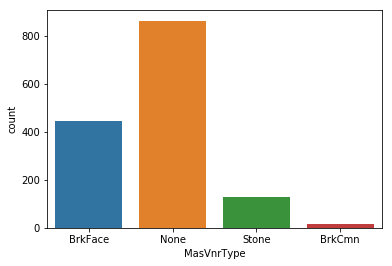

In [15]:
seaborn.countplot(x="MasVnrType",data = trainData)




<span style="color:red">What is your observation?</span>(Write your observation here.)
From the garph, we know that the most values of MasVnrType belong to the "None" class.




#### Step 2.2.2
Use the most common value of the feature to impute the missing values. Again, fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of the pandas library can be used.

In [16]:
trainData["MasVnrType"].fillna("None", inplace = True)


#### Step 2.2.3

Then, let's look at the feature: <strong>MasVnrArea</strong>.

Since we have replaced the missing values of MasVnrType with "None", we should look at the values of <del>MasVnrType</del> <strong>MasVnrArea</strong> with respect to those with MasVnrType of "None".

To do this, evaluate the distribution using countplot function (<a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">seaborn.countplot</a>) of seaborn library.

Note: to get those instances whose value of MasVnrType is "None":
<pre>
trainData.loc[trainData.MasVnrType =="None"]
</pre>

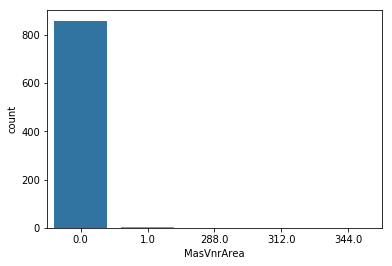

In [17]:
noneData = trainData.loc[trainData.MasVnrType =="None"]
seaborn.countplot(x="MasVnrArea", data = noneData)


<span style="color:red">What is your observation?</span> (Write your observation here.)
From the garhp, we get that the most of the value in MasVnrArea having the value 0

#### Step 2.2.4
Use the most common value of the feature to impute the missing values. Again, fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of the pandas library can be used.

In [18]:
trainData["MasVnrArea"].fillna(0, inplace = True)


### Step 2.3

The feature <strong>LotFrontage</strong> also has missing values.

#### Step 2.3.1
For the feature <strong>LotFrontage</strong>, evaluate its distribution using hist function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html">pandas.DataFrame.hist</a>) of pandas library.

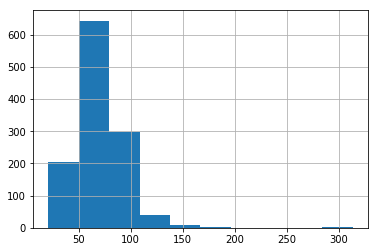

In [19]:
trainData["LotFrontage"].hist()

#### Step 2.3.2
Compute the mean OR median of the <del>second least missing values</del> <strong>feature LotFrontage</strong> using mean (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html">pandas.DataFrame.mean</a>) / median function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html">pandas.DataFrame.median</a>) of pandas library.

Note: You have to skip all the missing values when computing the mean or median.

In [20]:
trainData["LotFrontage"].median()


69.0

#### Step 2.3.3
Use mean / median to impute the missing values of the feature <del>with the second least missing values</del> <strong>LotFrontage</strong>. fillna function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>) of pandas library can be used.

In [21]:
trainData["LotFrontage"].fillna(69, inplace = True)


### Step 2.4

Since there is only one missing instance in the feature 'Electrical', we will keep the feature and just delete that instance.

In [22]:
trainData = trainData.drop(trainData.loc[trainData['Electrical'].isnull()].index)
# Run the above code

### Step 2.5

For the last feature with missing value, <strong>GarageYrBlt</strong>, we will just drop this feature
using drop function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html">pandas.DataFrame.drop</a>) of the pandas library) since there is already the feature 'YearBuilt'.

In [23]:
trainData = trainData.drop(columns = "GarageYrBlt")


## Step 3: Transforming data

### Step 3.1
Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html">pandas.DataFrame.replace</a> function, transfor the following numerical features to categorical.

<ul>
<li>MSSubClass:<br />
20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"
</li>
<li>MoSold:<br />
1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"
</li>
</ul>

In [24]:
trainData = trainData.replace({"MSSubClass":{20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})
trainData = trainData.replace({"MoSold":{1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})



### Step 3.2
Using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html">pandas.DataFrame.replace</a> function, transfor values of the following categorical features to numerical values.

<ul>
<li>
Alley : {"Grvl" : 1, "Pave" : 2},
</li><li>
BsmtCond : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
</li><li>
BsmtExposure : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3}
</li><li>
BsmtFinType1 : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6}
</li><li>
BsmtFinType2 : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6}
</li><li>
BsmtQual : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}
</li><li>
ExterCond : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}
</li><li>
ExterQual : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}
</li><li>
FireplaceQu : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
</li><li>
Functional : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8}
</li><li>
GarageCond : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
</li><li>
GarageQual : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
</li><li>
HeatingQC : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
</li><li>
KitchenQual : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
</li><li>
LandSlope : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}
</li><li>
LotShape : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}
</li><li>
PavedDrive : {"N" : 0, "P" : 1, "Y" : 2}
</li><li>
PoolQC : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}
</li><li>
Street : {"Grvl" : 1, "Pave" : 2}
</li><li>
Utilities : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
</li>
</ul>

In [25]:
trainData = trainData.replace({"Alley" : {"Grvl" : 1, "Pave" : 2}})
trainData = trainData.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
trainData = trainData.replace({"BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3}})
trainData = trainData.replace({"BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}})
trainData = trainData.replace({"BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}})
trainData = trainData.replace({"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})
trainData = trainData.replace({"ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}})
trainData = trainData.replace({"ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}})
trainData = trainData.replace({"FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
trainData = trainData.replace({"Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8}})
trainData = trainData.replace({"GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
trainData = trainData.replace({"GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
trainData = trainData.replace({"HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
trainData = trainData.replace({"KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}})
trainData = trainData.replace({"LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}})
trainData = trainData.replace({"LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}})
trainData = trainData.replace({"PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}})
trainData = trainData.replace({"PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})
trainData = trainData.replace({"Street" : {"Grvl" : 1, "Pave" : 2}})
trainData = trainData.replace({"Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})


## Step 4: Creating new features and dropping redundant features

### Step 4.0
We can create new features by combining some existing features.
For example, we can combine GrLiveArea with TotalBsmtSF to form a new feature called TotalSF.
- Define a new feature 'TotalSF' and assign it with the sum of GrLiveArea and TotalBsmtSF.

In [26]:
trainData["TotalSF"] = trainData["GrLivArea"] + trainData["TotalBsmtSF"]
# Run the above code

### Step 4.1
Similarly, we can create more new features considering the followings:
<ul>
<li>
Overall quality of the house: product of OverallQual and OverallCond
</li><li>
Overall quality of the garage: product of GarageQual and GarageCond
</li><li>
Overall quality of the exterior: product of ExterQual and ExterCond
</li><li>
Overall kitchen score: product of KitchenAbvGr and KitchenQual
</li><li>
Overall fireplace score: product of Fireplaces and FireplaceQu
</li><li>
Overall garage score: product of GarageArea and GarageQual
</li><li>
Overall pool score: product of PoolAre and PoolQC
</li><li>
Total number of bathrooms: sum of BsmtFullBath, half of BsmtHalfBath, FullBath and half of HalfBath
</li><li>
Total SF for 1st + 2nd floors: sum of 1stFlrSF and 2ndFlrSF
</li><li>
Total SF for porch: sum of OpenPorchSF, EnclosedPorch, 3SsnPrch, and ScreenPorch
</li>
<ul>

In [27]:
trainData["OverallHouse"] = trainData["OverallQual"] * trainData["OverallCond"]
trainData["OverallGarage"] = trainData["GarageQual"] * trainData["GarageCond"]
trainData["OverallExterior"] = trainData["ExterQual"] * trainData["ExterCond"]
trainData["KitchenScore"] = trainData["KitchenAbvGr"] * trainData["KitchenQual"]
trainData["FireplaceScore"] = trainData["Fireplaces"] * trainData["FireplaceQu"]
trainData["GarageScore"] = trainData["GarageArea"] * trainData["GarageQual"]
trainData["PoolScore"] = trainData["PoolArea"] * trainData["PoolQC"]
trainData["Bathrooms#"] = trainData["BsmtFullBath"] + 0.5*trainData["BsmtHalfBath"] + trainData["FullBath"] + 0.5*trainData["HalfBath"]
trainData["SFTwoFloors"] = trainData["1stFlrSF"] + trainData["2ndFlrSF"]
trainData["SFPorch"] = trainData["OpenPorchSF"] + trainData["EnclosedPorch"] + trainData["3SsnPorch"] + trainData["ScreenPorch"]





### Step 4.2
- The feature "Id" can be dropped (using drop function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html">pandas.DataFrame.drop</a>) of the pandas library).

In [28]:
trainData = trainData.drop(columns=["Id"])


## Step 5: Analysing data statistically and graphically

### Step 5.1
Use describe function (<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html">pands.DataFrame.describe</a>) of pandas library to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.

In [29]:
trainData.describe()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice,TotalSF,OverallHouse,OverallGarage,OverallExterior,KitchenScore,FireplaceScore,GarageScore,PoolScore,Bathrooms#,SFTwoFloors,SFPorch
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1378.000000,1378.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1378.000000,1459.000000,1459.00000,1459.000000,1378.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,69.861549,10517.363948,1.995888,3.591501,3.998629,2.937629,6.100069,5.575737,1971.244003,1984.850583,103.187800,3.396162,3.083619,3.488691,2.934887,0.656614,3.547635,443.943797,1.247430,46.581220,567.366004,1057.891021,4.145305,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,3.511309,6.517478,7.841672,0.613434,1.826594,1.766964,473.030158,2.975327,2.973875,1.856066,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,0.013023,43.518849,2007.815627,180930.394791,2573.437971,33.870459,8.885341,10.474297,3.64976,2.127485,1498.896226,7.413982,2.210418,1509.698424,87.144620
std,22.035077,9984.666267,0.064018,0.582398,0.052360,0.276322,1.383171,1.113079,30.199555,20.644343,180.773158,0.574384,0.351167,0.876677,0.552345,1.039337,2.107443,456.106417,0.892615,161.369977,441.992392,438.500975,0.959822,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,0.663864,1.625902,0.667914,0.644687,1.810866,0.747546,213.869604,0.248687,0.239613,0.496748,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,0.204128,496.291826,1.328542,79468.964025,823.617657,9.219861,1.234897,2.106197,0.85828,2.338954,585.100828,116.219460,0.785631,521.333418,105.201696
min,21.000000,1300.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000,334.000000,1.000000,1.000000,3.000000,0.00000,0.000000,200.000000,0.000000,1.000000,334.000000,0.000000
25%,60.000000,7549.000000,2.000000,3.000000,4.000000,3.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,223.000000,796.000000,3.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,0.000000,1.000000,333.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129950.000000,2014.500000,30.000000,9.000000,9.000000,3.00000,0.000000,1101.750000,0.000000,2.000000,1123.500000,0.000000
50%,69.000000,9477.000000,2.000000,4.

### Step 5.2
We can explore the correlations between features.

#### Step 5.2.1
Using <a href="http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html">pandas.DataFrame.corr</a> function to compute the pairwise correlation.

In [30]:
trainData.corr(method = "pearson")


,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,SalePrice,TotalSF,OverallHouse,OverallGarage,OverallExterior,KitchenScore,FireplaceScore,GarageScore,PoolScore,Bathrooms#,SFTwoFloors,SFPorch
LotFrontage,1.000000,0.304533,-0.037356,-0.191522,0.001024,-0.065627,0.234942,-0.053235,0.116627,0.083277,0.178545,0.165663,-0.016407,0.141797,0.046877,0.161620,0.072720,0.214533,0.018062,0.042493,0.124147,0.363919,0.090067,0.414037,0.072334,0.037481,0.368039,0.090444,-0.006956,0.180497,0.047126,0.236828,-0.004884,0.169790,0.320501,0.023162,0.233388,0.224603,0.269520,0.323559,0.051982,0.037622,0.088096,0.075538,0.137107,0.010323,0.061957,0.037683,0.180827,0.234922,-0.000247,0.006367,0.334793,0.428644,0.151889,0.045764,0.131880,0.127012,0.243689,0.325567,0.209636,0.200356,0.367590,0.129614
LotArea,0.304533,1.000000,-0.197128,-0.315500,-0.010122,-0.436864,0.105786,-0.005665,0.014296,0.013852,0.103302,0.055542,0.014720,0.072375,0.031356,0.232298,0.058960,0.214121,0.086617,0.111158,-0.002641,0.260962,0.003573,0.299533,0.051030,0.004773,0.263109,0.158147,0.048034,0.126100,0.014333,0.119700,-0.017796,0.067916,0.190037,-0.025116,0.271398,0.185343,0.154893,0.180392,0.028751,0.018849,0.015150,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.091378,0.038063,-0.014254,0.263837,0.306860,0.085592,0.023397,0.054938,0.038902,0.269615,0.164334,0.083264,0.204794,0.264843,0.071282
Street,-0.037356,-0.197128,1.000000,0.010099,-0.001683,0.179353,0.058871,0.042875,0.021096,0.065443,0.017135,0.100294,-0.015202,0.011392,-0.007578,-0.093396,0.016704,-0.015605,-0.078202,-0.038475,0.035249,0.005139,0.043218,0.005999,0.046960,0.007729,0.044132,-0.050500,0.015496,0.046446,0.027588,0.028858,0.013593,0.065649,0.046817,-0.015238,-0.005308,0.023426,-0.020039,-0.047781,-0.005989,-0.006582,0.024509,-0.017992,-0.005634,0.023099,0.007479,-0.033149,0.004416,0.004101,-0.022729,-0.025050,0.041043,0.030902,0.071142,-0.005605,0.075517,0.061148,-0.005657,-0.080096,0.004101,0.010398,0.043777,-0.005615
LotShape,-0.191522,-0.315500,0.010099,1.000000,0.026608,0.144167,-0.198688,0.034004,-0.230061,-0.176103,-0.089550,-0.188399,-0.013961,-0.211898,-0.108328,-0.178641,-0.110986,-0.157328,-0.061392,-0.060293,-0.013983,-0.199926,-0.119504,-0.188847,-0.089731,0.008032,-0.212670,-0.064270,-0.057624,-0.184663,-0.117246,-0.060117,0.094989,-0.158343,-0.137318,-0.023562,-0.201659,-0.192727,-0.195173,-0.173344,-0.095617,-0.077834,-0.103803,-0.161766,-0.092828,0.095285,-0.033751,-0.065065,-0.047075,-0.053299,-0.028600,0.037331,-0.267726,-0.242173,-0.138871,-0.085253,-0.165685,-0.050416,-0.196879,-0.163879,-0.049189,-0.218242,-0.215181,-0.047003
Utilities,0.001024,-0.010122,-0.001683,0.026608,1.000000,-0.005913,0.001895,-0.009986,0.011489,0.034074,-0.063449,0.018069,0.006238,0.014604,-0.003088,0.016551,-0.030486,0.019124,-0.051438,-0.049909,0.012647,0.014272,0.003966,-0.012273,0.020809,0.003150,0.008550,0.021486,-0.103378,0.026853,0.019928,-0.004291,0.005540,-0.019285,-0.007775,-0.006210,-0.015709,-0.031443,-0.008167,-0.006366,-0.002675,-0.002939,-0.007591,0.019691,-0.028191,0.009414,0.003048,-0.102363,0.001800,0.001671,0.002297,-0.023355,0.014317,0.013055,-0.006051,-0.002503,0.018338,-0.010691,-0.020974,-0.003506,0.001671,0.023690,0.008327,-0.065707
LandSlope,-0.065627,-0.436864,0.179353,0.144167,-0.005913,1.000000,0.066588,-0.010276,0.073496,0.058963,0.021174,0.086647,0.039648,0.006996,-0.026627,-0.265682,-0.050840,-0.113723,-0.076426,-0.085478,0.116530,-0.032287,0.057469,-0.068187,0.00

#### Step 5.2.2
Display the pairwise correlation with a heatmap using <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html">seaborn.heatmap</a>.

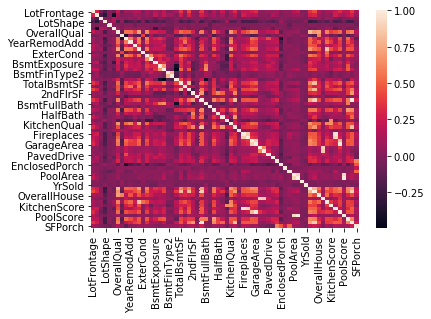

In [31]:
corr = trainData.corr(method = "pearson")
seaborn.heatmap(corr)


<span style="color:red">Give two observations.</span> (Write your observation(s) here.)
1. Nearly half of the features have strong correlation to other features.
2. Feature "LotShape" and "ScreenPorch" have no or negative to other features.

### Step 5.3
Using Scatter Plot

#### Step 5.3.1
Explore SalePrice with respect to GrLiveArea using scatter function 
(<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html">matplotlib.pyplot.scatter</a>) of matplotlib library.

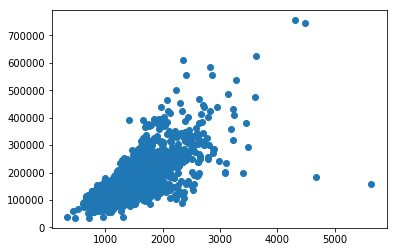

In [32]:
matplotlib.pyplot.scatter(x = trainData["GrLivArea"], y = trainData["SalePrice"])



<span style="color:red">What is your observation?</span> (Write your observation here.)
From the garph, we know that most of the SalePrice is increased with GrLiveArea. However, there have some noise.

<span style="color:red">What can we do?</span> (Write your answer here.)
We can remove the noise before we analyse the relation between SalePrice and GrLiveArea.



#### Step 5.3.2
Explore SalePrice with respect to TotalSF using scatter function 
(<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html">matplotlib.pyplot.scatter</a>) of matplotlib library.

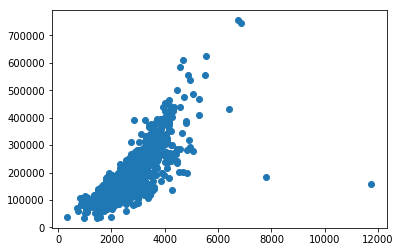

In [33]:
matplotlib.pyplot.scatter(x = trainData["TotalSF"], y = trainData["SalePrice"])


<span style="color:red">What is your observation?</span> (Write your observation here.)
From the garph, we also know that most of the SalePrice is increased with GrLiveArea and the slope is bigger than GrLiveArea.

#### Step 5.3.3
Explore SalePrice with respect to YearBuilt using scatter function 
(<a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html">matplotlib.pyplot.scatter</a>) of matplotlib library.

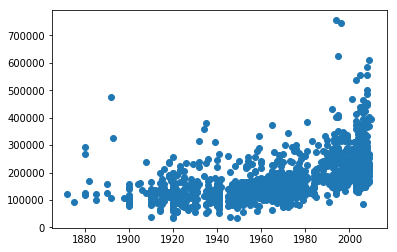

In [34]:
matplotlib.pyplot.scatter(x = trainData["YearBuilt"], y = trainData["SalePrice"])


<span style="color:red">What is your observation?</span> (Write your obeservation here.)
From the garph, we get that the house with the shorest buildYear would have a higer price.


### Step 5.4
Using Count Plot

#### Step 5.4.1
Explore MoSold (Month Sold) using countplot function (<a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">seaborn.countplot</a>) of seaborn library.

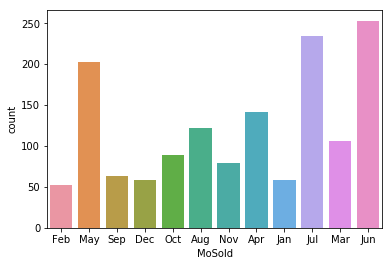

In [35]:
seaborn.countplot(x = trainData["MoSold"])


<span style="color:red">What is your observation?</span> (Write your obeservation here.)
In the month of summer day, like May, Jun and Jul have the higer sales of the house.


### Step 5.5
Using Box Plot

#### Step 5.5.1
Explore the new feature OverallQual with respect to SalePrice using boxplot function (<a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">seaborn.boxplot</a>) of seaborn library.

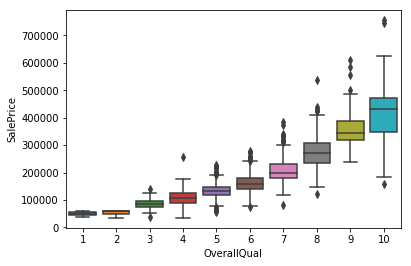

In [36]:
seaborn.boxplot(x = "OverallQual", y = "SalePrice", data = trainData)


<span style="color:red">What is your observation?</span> (Write your obeservation here.)

The OverallQual is larger, the SalePrice is higher.
The largest OverallQual have the largest std.

#### Step 5.5.2
Explore the new feature (Total Number of Bathrooms) created in step 4.1 with respect to SalePrice using boxplot function (<a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">seaborn.boxplot</a>) of seaborn library.

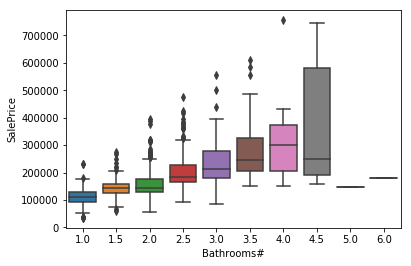

In [37]:
seaborn.boxplot(x = "Bathrooms#", y = "SalePrice", data = trainData)


<span style="color:red">What is your observation?</span> (Write your obeservation here.)

The houses have more bathrooms, which would have a higher SalePrice.
The largest Bathrooms number have the largest std.


#### Step 5.5.3
Explore the Neigborhood with respect to SalePrice using boxplot function (<a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">seaborn.boxplot</a>) of seaborn library.

Note: you may want to change the size of the plot using <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html">matplotlib.pylot.subplots</a> function
<pre>f, ax = plt.subplots(figsize=(26, 12))</pre>
before creating the box plot.

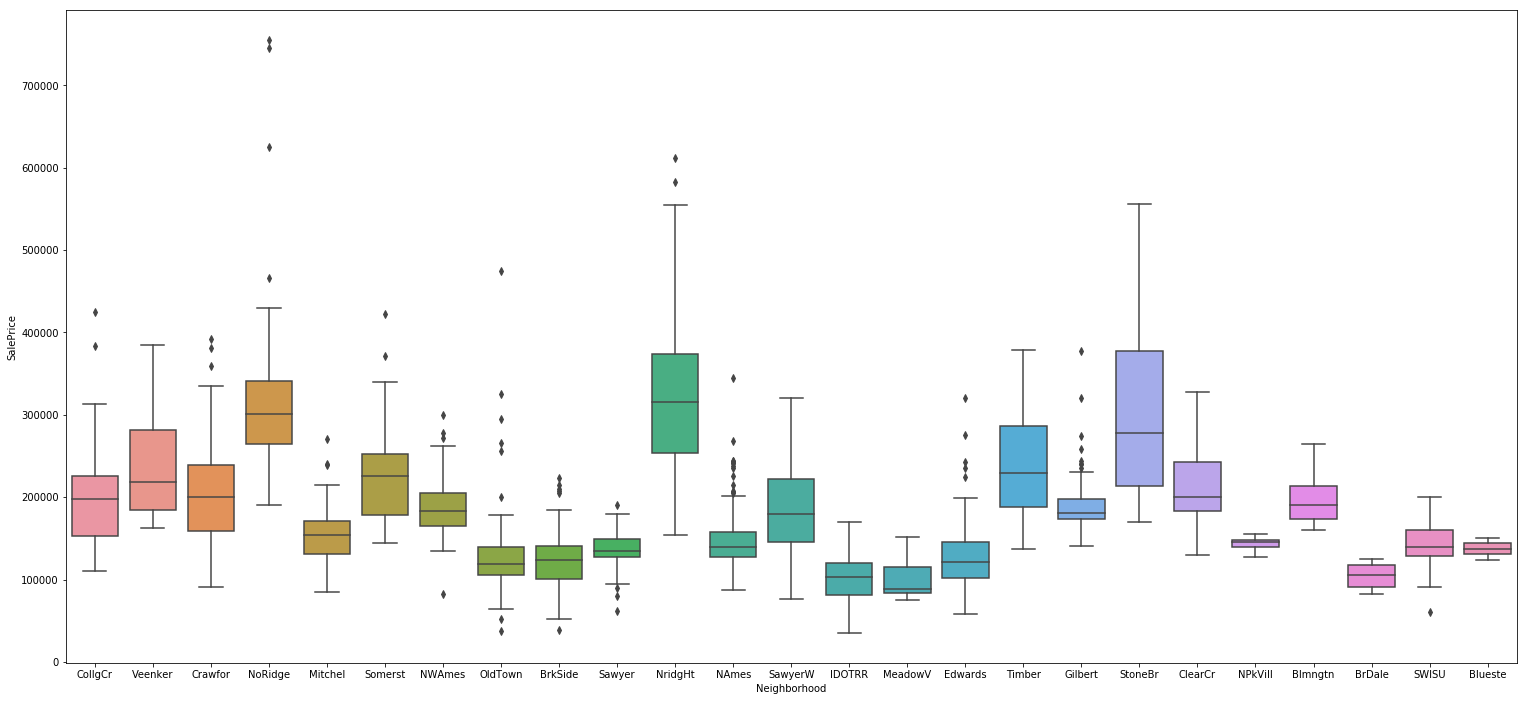

In [38]:
f, ax = matplotlib.pyplot.subplots(figsize=(26, 12))
seaborn.boxplot(x = "Neighborhood", y = "SalePrice", data = trainData)


<span style="color:red">What is your observation?</span> (Write your obeservation here.)

The houses near NridgHt or StoneBr will have the higher SalePrices. 


## Step 6 Normailzation

### Step 6.1 
Explore the distribution of SalePrice using <a href="https://seaborn.pydata.org/generated/seaborn.distplot.html">seaborn.displot</a> function.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


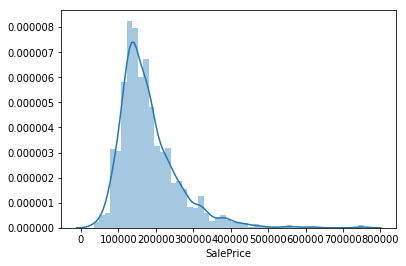

In [39]:
seaborn.distplot(trainData["SalePrice"])


### Step 6.2

We can also get the skewness and kurtosis using 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html">pandas.DataFrame.skew</a>
and 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurt.html">pandas.DataFrame.kurt</a> functions.

In [40]:
trainData["SalePrice"].skew()

1.8819429948035529

In [41]:
trainData["SalePrice"].kurt()

6.529263049673958

### Step 6.3

Apply log transformation to SalePrice using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html">numpy.log</a> function.

In [42]:
LogPrice = numpy.log(trainData["SalePrice"])


### Step 6.4

Plot the distribution of SalePrice using seaborn.distplot function again.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


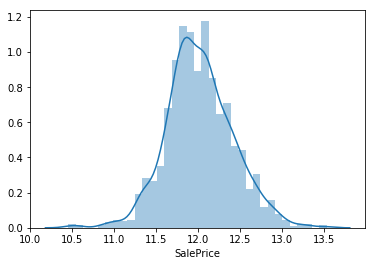

In [43]:
seaborn.distplot(LogPrice)

## Bonus Tasks 

You may consider working on the followings:
<ol>
<li>Investigating whether normalization should be performed on any other features.
</li><li>Performing more/other exploratory data analysis to explore other factors constituting to higher/lower SalePrice.
</li>
</ol>

Note: The bonus tasks will worth at most 10 points depending on the amount and quality of the tasks. 
This assignment worths 100 points. The maximum score of this assignment including bonus is 110 points.
But the maximum score of the 2 assignments together is 200.

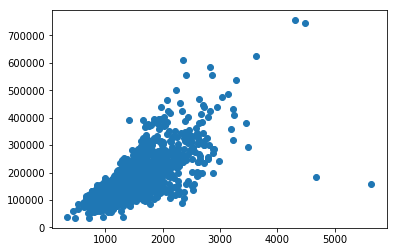

In [44]:
matplotlib.pyplot.scatter(x = trainData["SFTwoFloors"], y = trainData["SalePrice"])

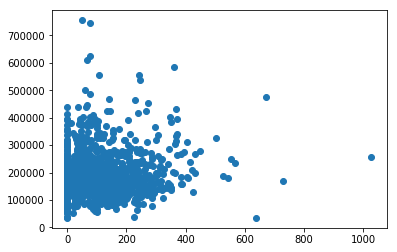

In [45]:
matplotlib.pyplot.scatter(x = trainData["SFPorch"], y = trainData["SalePrice"])



## General Idea:
From the Garph, we can get that SalePrice is increased with Total SF for 1st + 2nd floors while have no obvious relation with Total SF for porch.